In [1]:
import pynbody
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import BH_functions as bhf
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

IOError: File csvdata/iords.csv does not exist

In [2]:
#galaxy_masses=pd.DataFrame()
#BH_halos=pd.DataFrame()
snap_id=0
global iords
iords=pd.read_csv('csvdata/iords.csv',index_col='snap')

In [3]:
#array of last four digits for each snap
snap_id_array=['0139','0225','0275','0640','0974','1024','1269','1280','1408','1740','2048','2088','2432','2688','2816','2944','3072','3195','3200','3328','3456','3584','3606','3712','3840','3968','4096']

In [4]:
#snap id index (negative values start from end)
snap_id=-1
snap_id_array[snap_id]

'4096'

In [5]:
snap_lowz, h_lowz, BH_lowz, BH_arm_lowz=bhf.do_all(snap_id_array[snap_id])

BH_arm iords: [101863565 101863739 101863883 101864796 101867516]


In [6]:
masses,iords=bhf.load_snap_csvs(snap_id_array[snap_id])
global iords_list
iords_list=iords.columns.tolist()
iords_list=map(int, iords_list)
time=pd.read_csv('csvdata/time.csv', index_col=0)
global time_axis
time_axis=pd.read_csv('csvdata/time_axis.csv', index_col=0)

In [7]:
for i in BH_arm_lowz['iord']:
    vars()['i_%s_data'%(i)]=pd.read_csv('csvdata/iord_%s.csv'%(i),index_col='snap')
    vars()['adj_i%s_orbit'%(i)]=pd.read_csv('~/adj_i%s_orbit.csv'%(i))

In [52]:
bhf.analysis(h_lowz[12], 'sideon')

In [50]:
halo_id, span, halos, BHlocal=bhf.bhplotfilter(snap_lowz, 30, BH_lowz, 12)

Currently centered on Halo 12
Halo 12 BH iord(s): [101864796]


Halos within 15 kpc: [12]
Local BH_iord(s): [101864796]


(-15.0, 15.0, -15.0, 15.0)

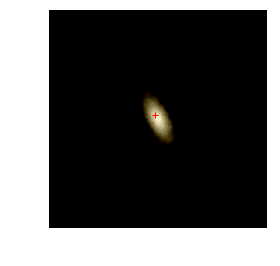

In [53]:
bhf.render(snap_lowz,width=30)
for l in BHlocal:
    plt.plot(np.array((BH_lowz[np.where(BH_lowz['iord']==l)]['pos'])).T[0],np.array((BH_lowz[np.where(BH_lowz['iord']==l)]['pos'])).T[1],'r+',linewidth=0.1, label='%s (h%s)'%(l,int(BH_lowz[np.where(BH_lowz['iord']==l)]['amiga.grp'])))
plt.xlim(-span/2,span/2)
plt.ylim(-span/2,span/2)
plt.axis('off')
#plt.savefig('presentation_images/h649f100.png', dpi=1000,figsize=(4,4))

In [ ]:
fig=plt.figure(dpi=1200,figsize=(6,4))
fig.figimage(image)
fig.savefig('presentation_images/fig2.png')

In [25]:
bhf.plot_all(i_101864796_data, adj_i101864796_orbit, time)#, save=True, filename='presentation_images/SMALLerrrr_h%s_plots.png')
plt.savefig('h12.pdf', dpi=1600, figsize=(6,6), format='pdf')

NameError: global name 'iords' is not defined

In [23]:
BH_arm_lowz['iord']

SimArray([101863565, 101863739, 101863883, 101864796, 101867516])